In [1]:
%autoreload 2

In [2]:
from pfns.priors.formula import get_batch, sample_dataset
from pfns.priors.formula.utils import print_tree
from pfns.priors.formula.ops import binary_ops, unary_ops
from pfns.priors.formula.get_batch import boring_y

In [181]:
import torch

t = torch.randn(10).sort().values

torch.unique_consecutive(t) - t


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [162]:
from pfns.priors.hyperparameter_sampling import UniformFloatDistConfig, ChoiceDistConfig
from pfns.priors.prior import AdhocPriorConfig

prior_config = AdhocPriorConfig(['formula', 'hyperparameter_sampling'],
                 prior_kwargs={
                    "batch_size_per_gp_sample": 1,
                    "hyperparameters": {
                                    #binary_op_likelihoods={**{op: 1.0 for op in binary_ops.keys()}, 'add': 2.},
                                    #unary_op_likelihoods={**{op: 1.0 for op in unary_ops.keys()}, 'rr_repeat': 10., 'rr_repeat_m': 0.},
                                    #factor_dist="normal", factor_std=2.,
                                    "bias_std": UniformFloatDistConfig(0.1,2.),
                                    "max_share_oversampled_tree_leaves": UniformFloatDistConfig(0.,4.),
                                    "unary_op_likelihood": UniformFloatDistConfig(.1,.9),
                                    "max_binary_op_noise_std": ChoiceDistConfig([.01,.0]),
                                    "max_unary_op_noise_std":ChoiceDistConfig([.01,.0]),
                                    "hyperparameter_sampling_skip_style_prob": .1,
                                    "hyperparameter_sampling_add_hps_to_style": "all_sampled",
                    }
               }
)

get_batch_function = prior_config.create_get_batch_method()

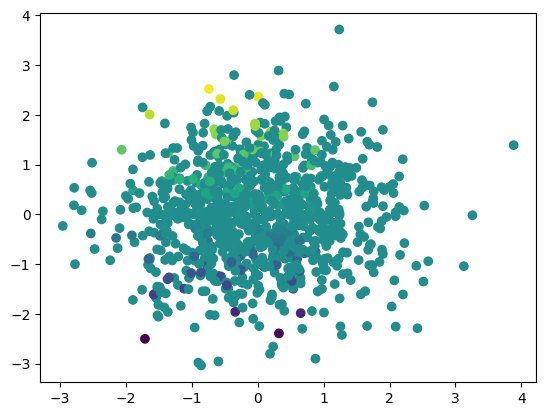

In [175]:
b = get_batch_function(1, 1000, 2)

for i in range(len(b.x)):
    plt.scatter(b.x[i,:,0], b.x[i,:,1],c=b.y[i,:])

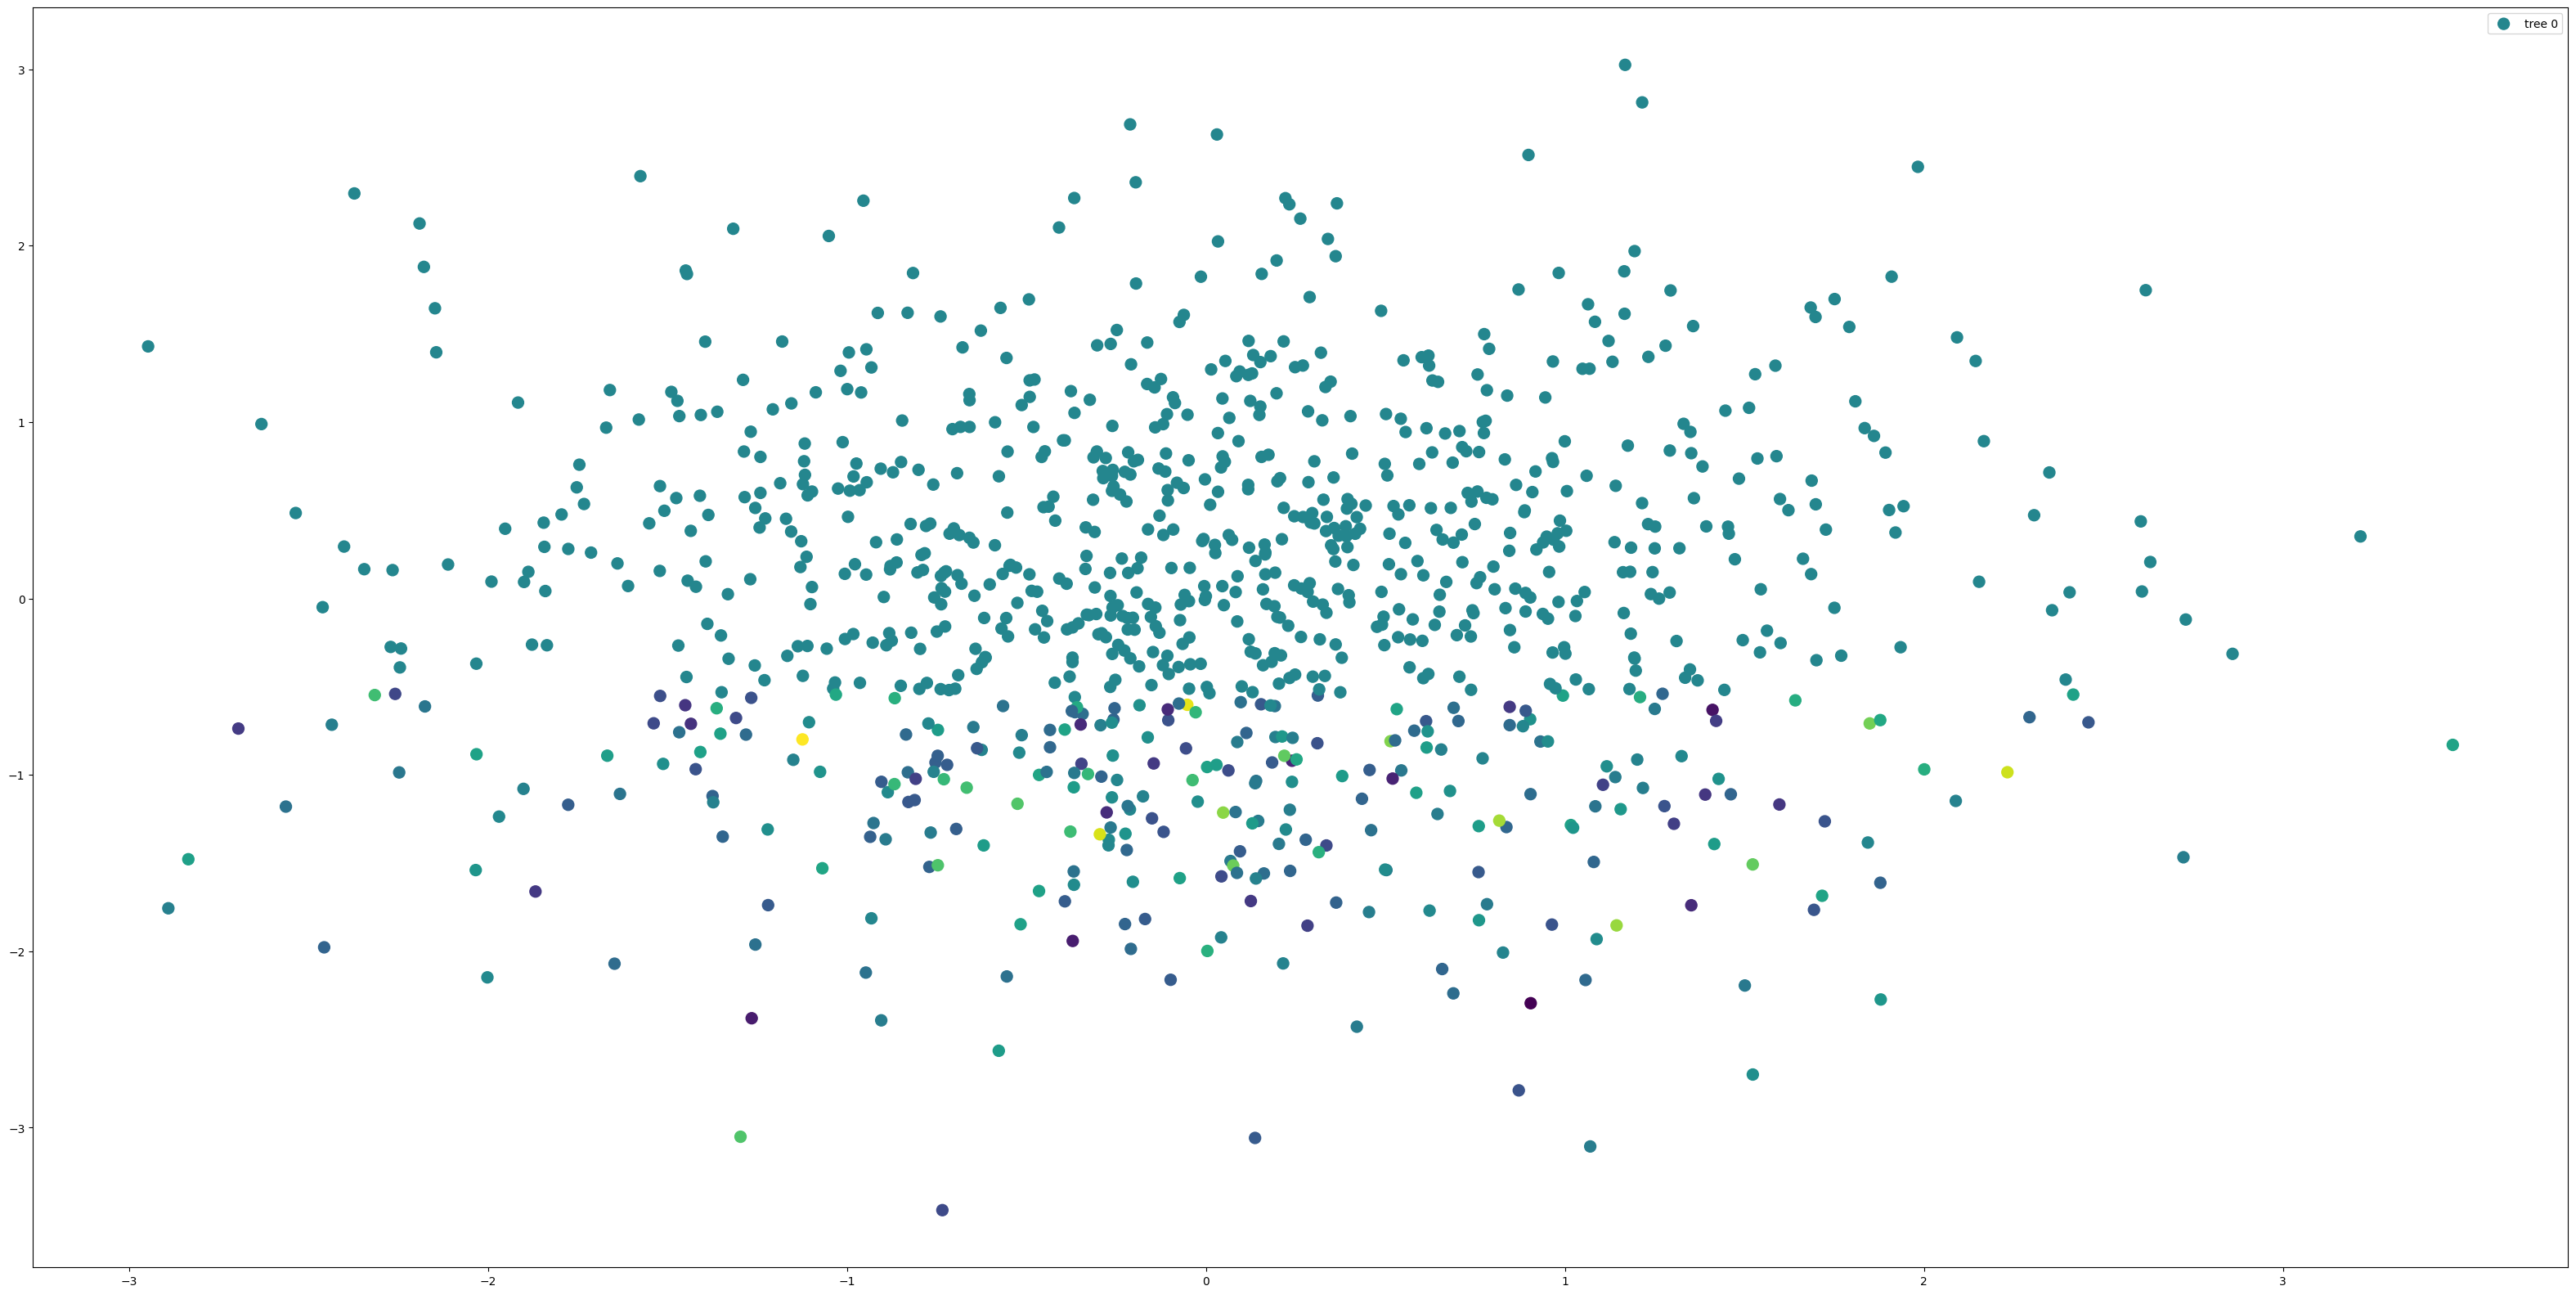

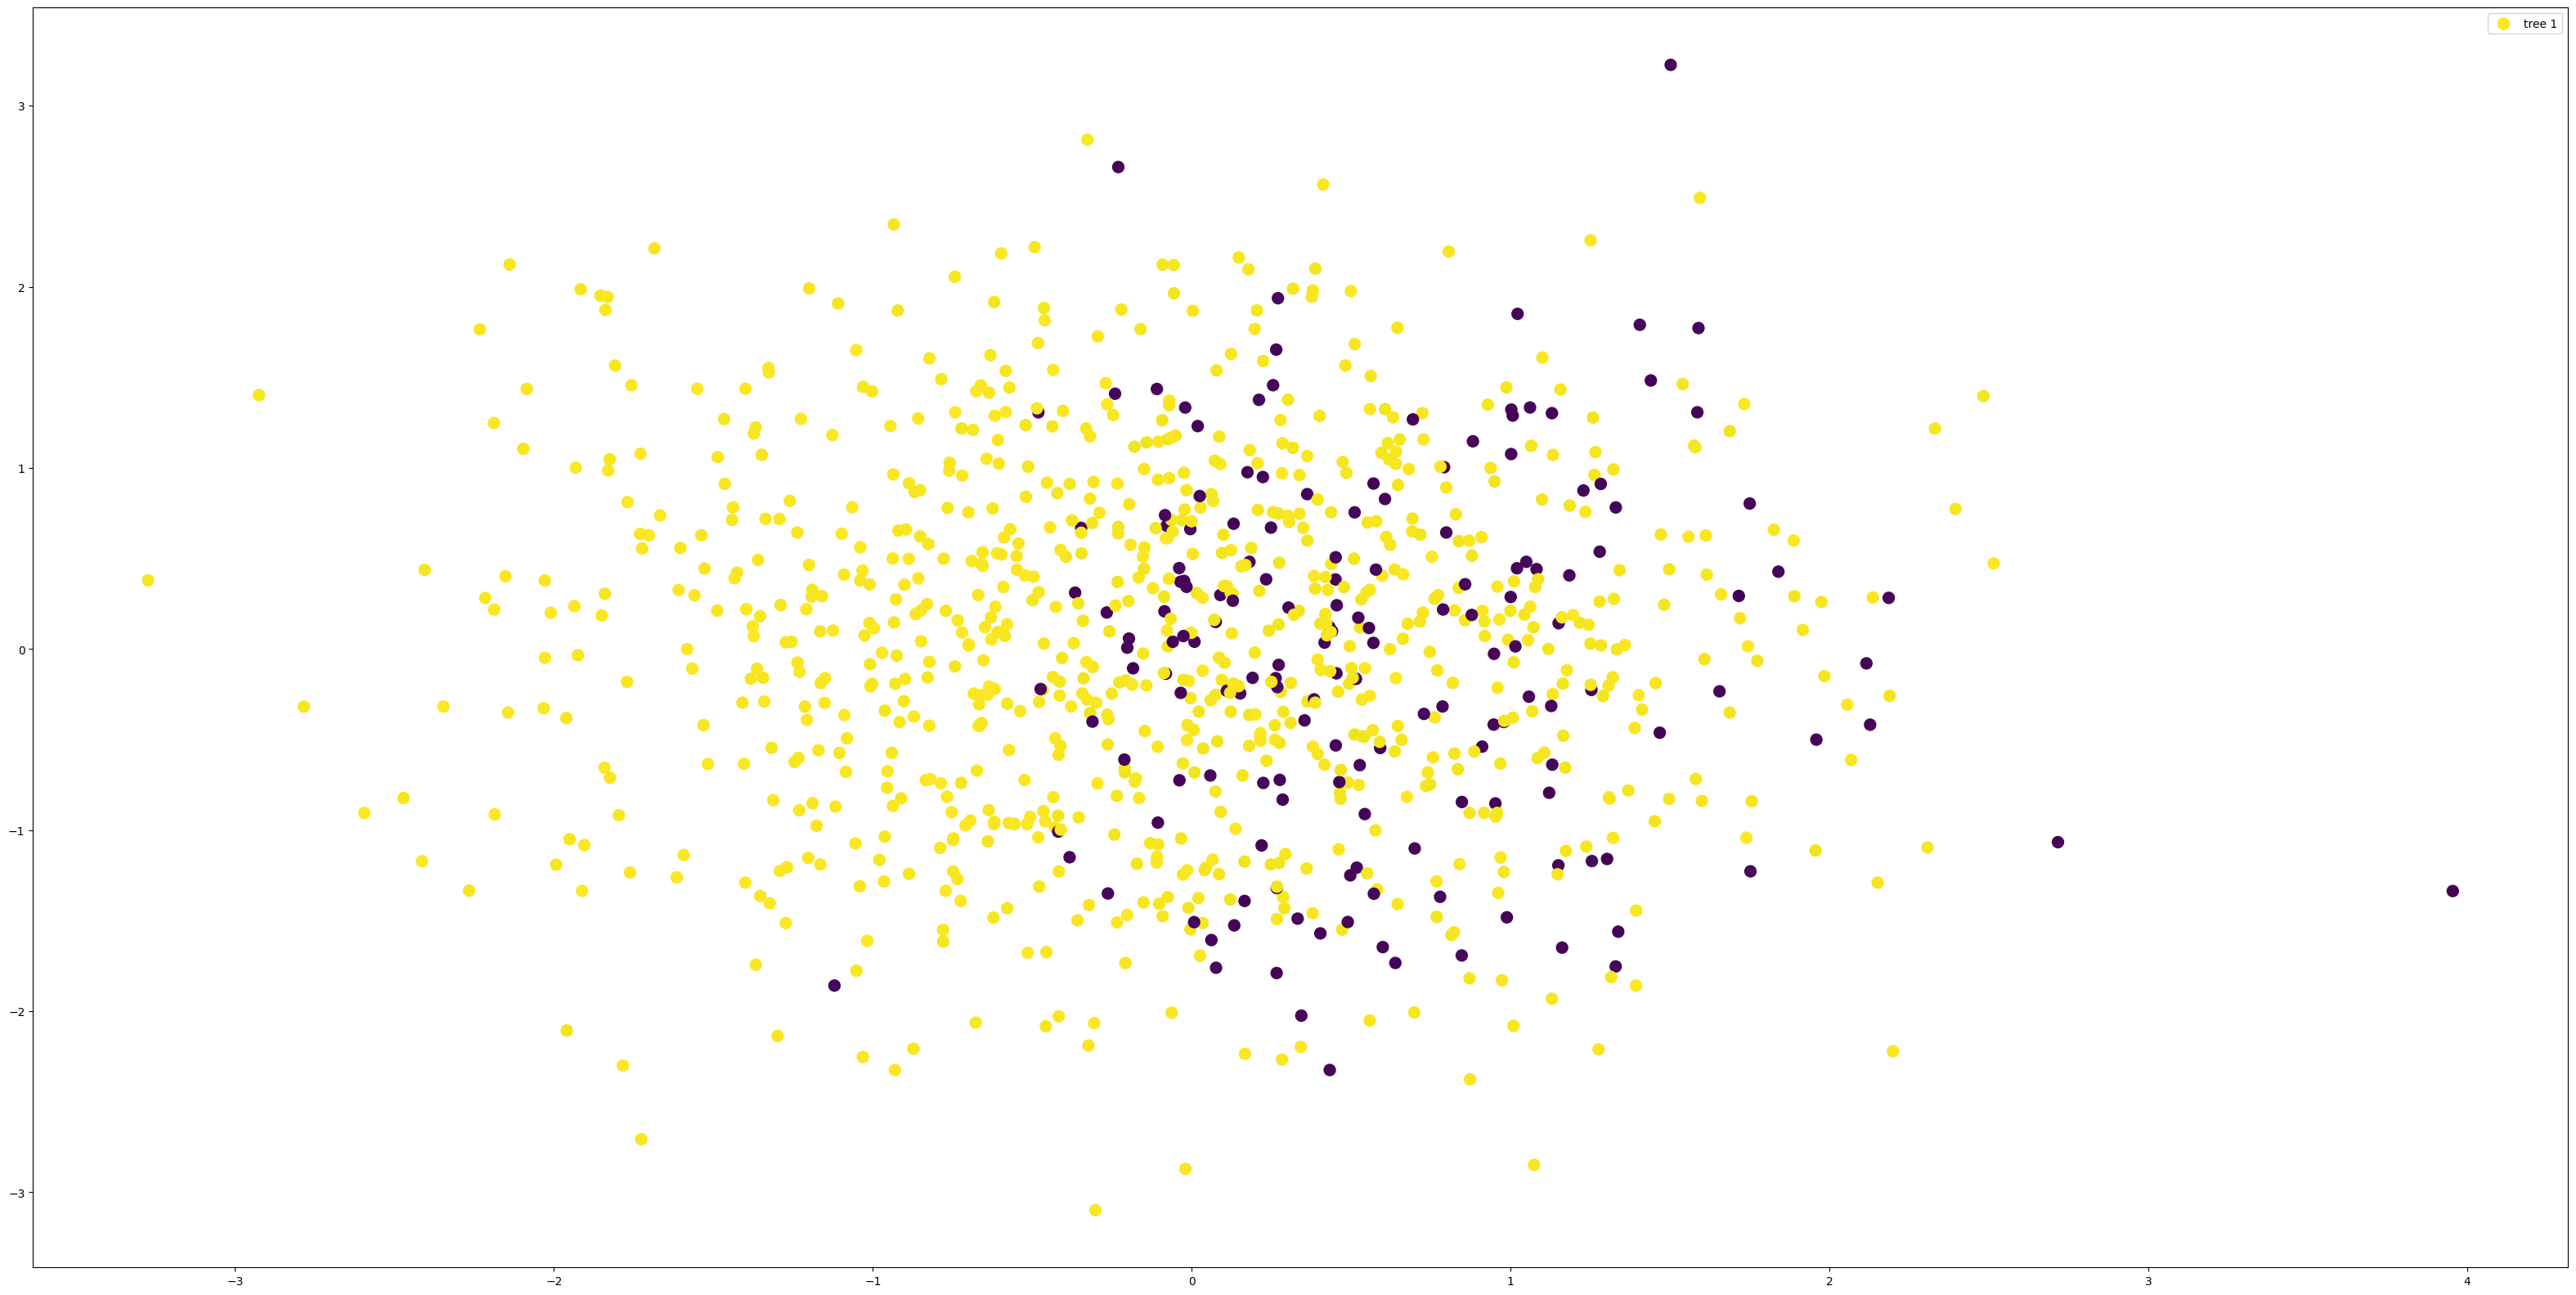

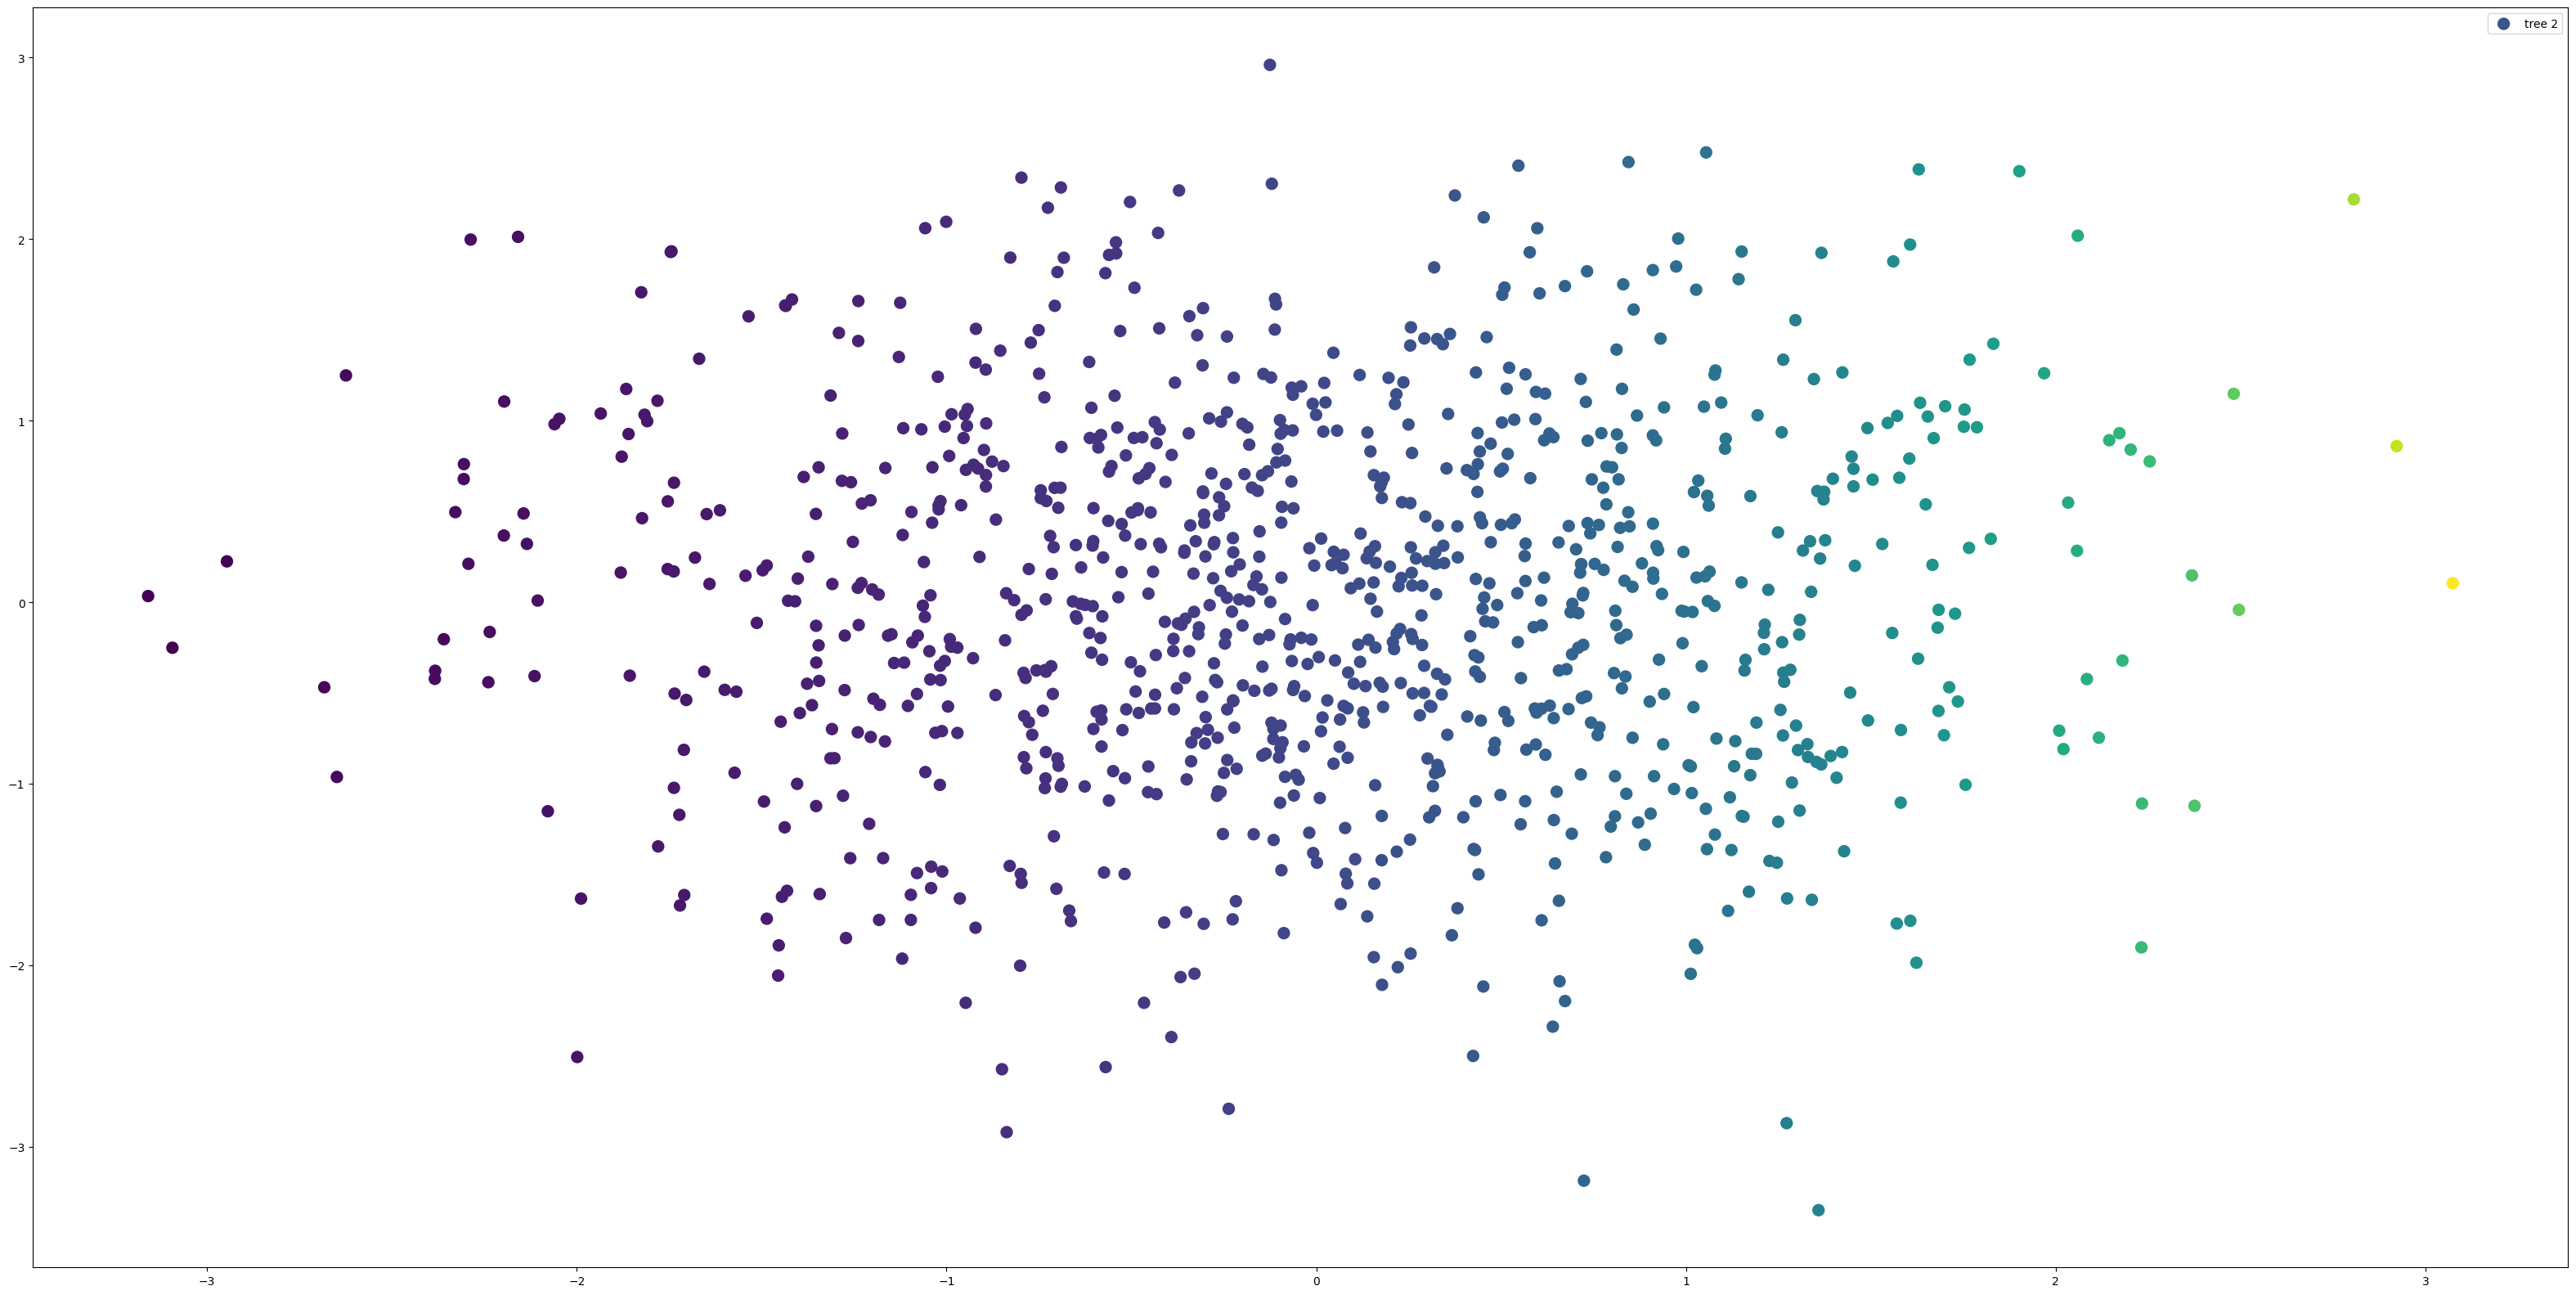

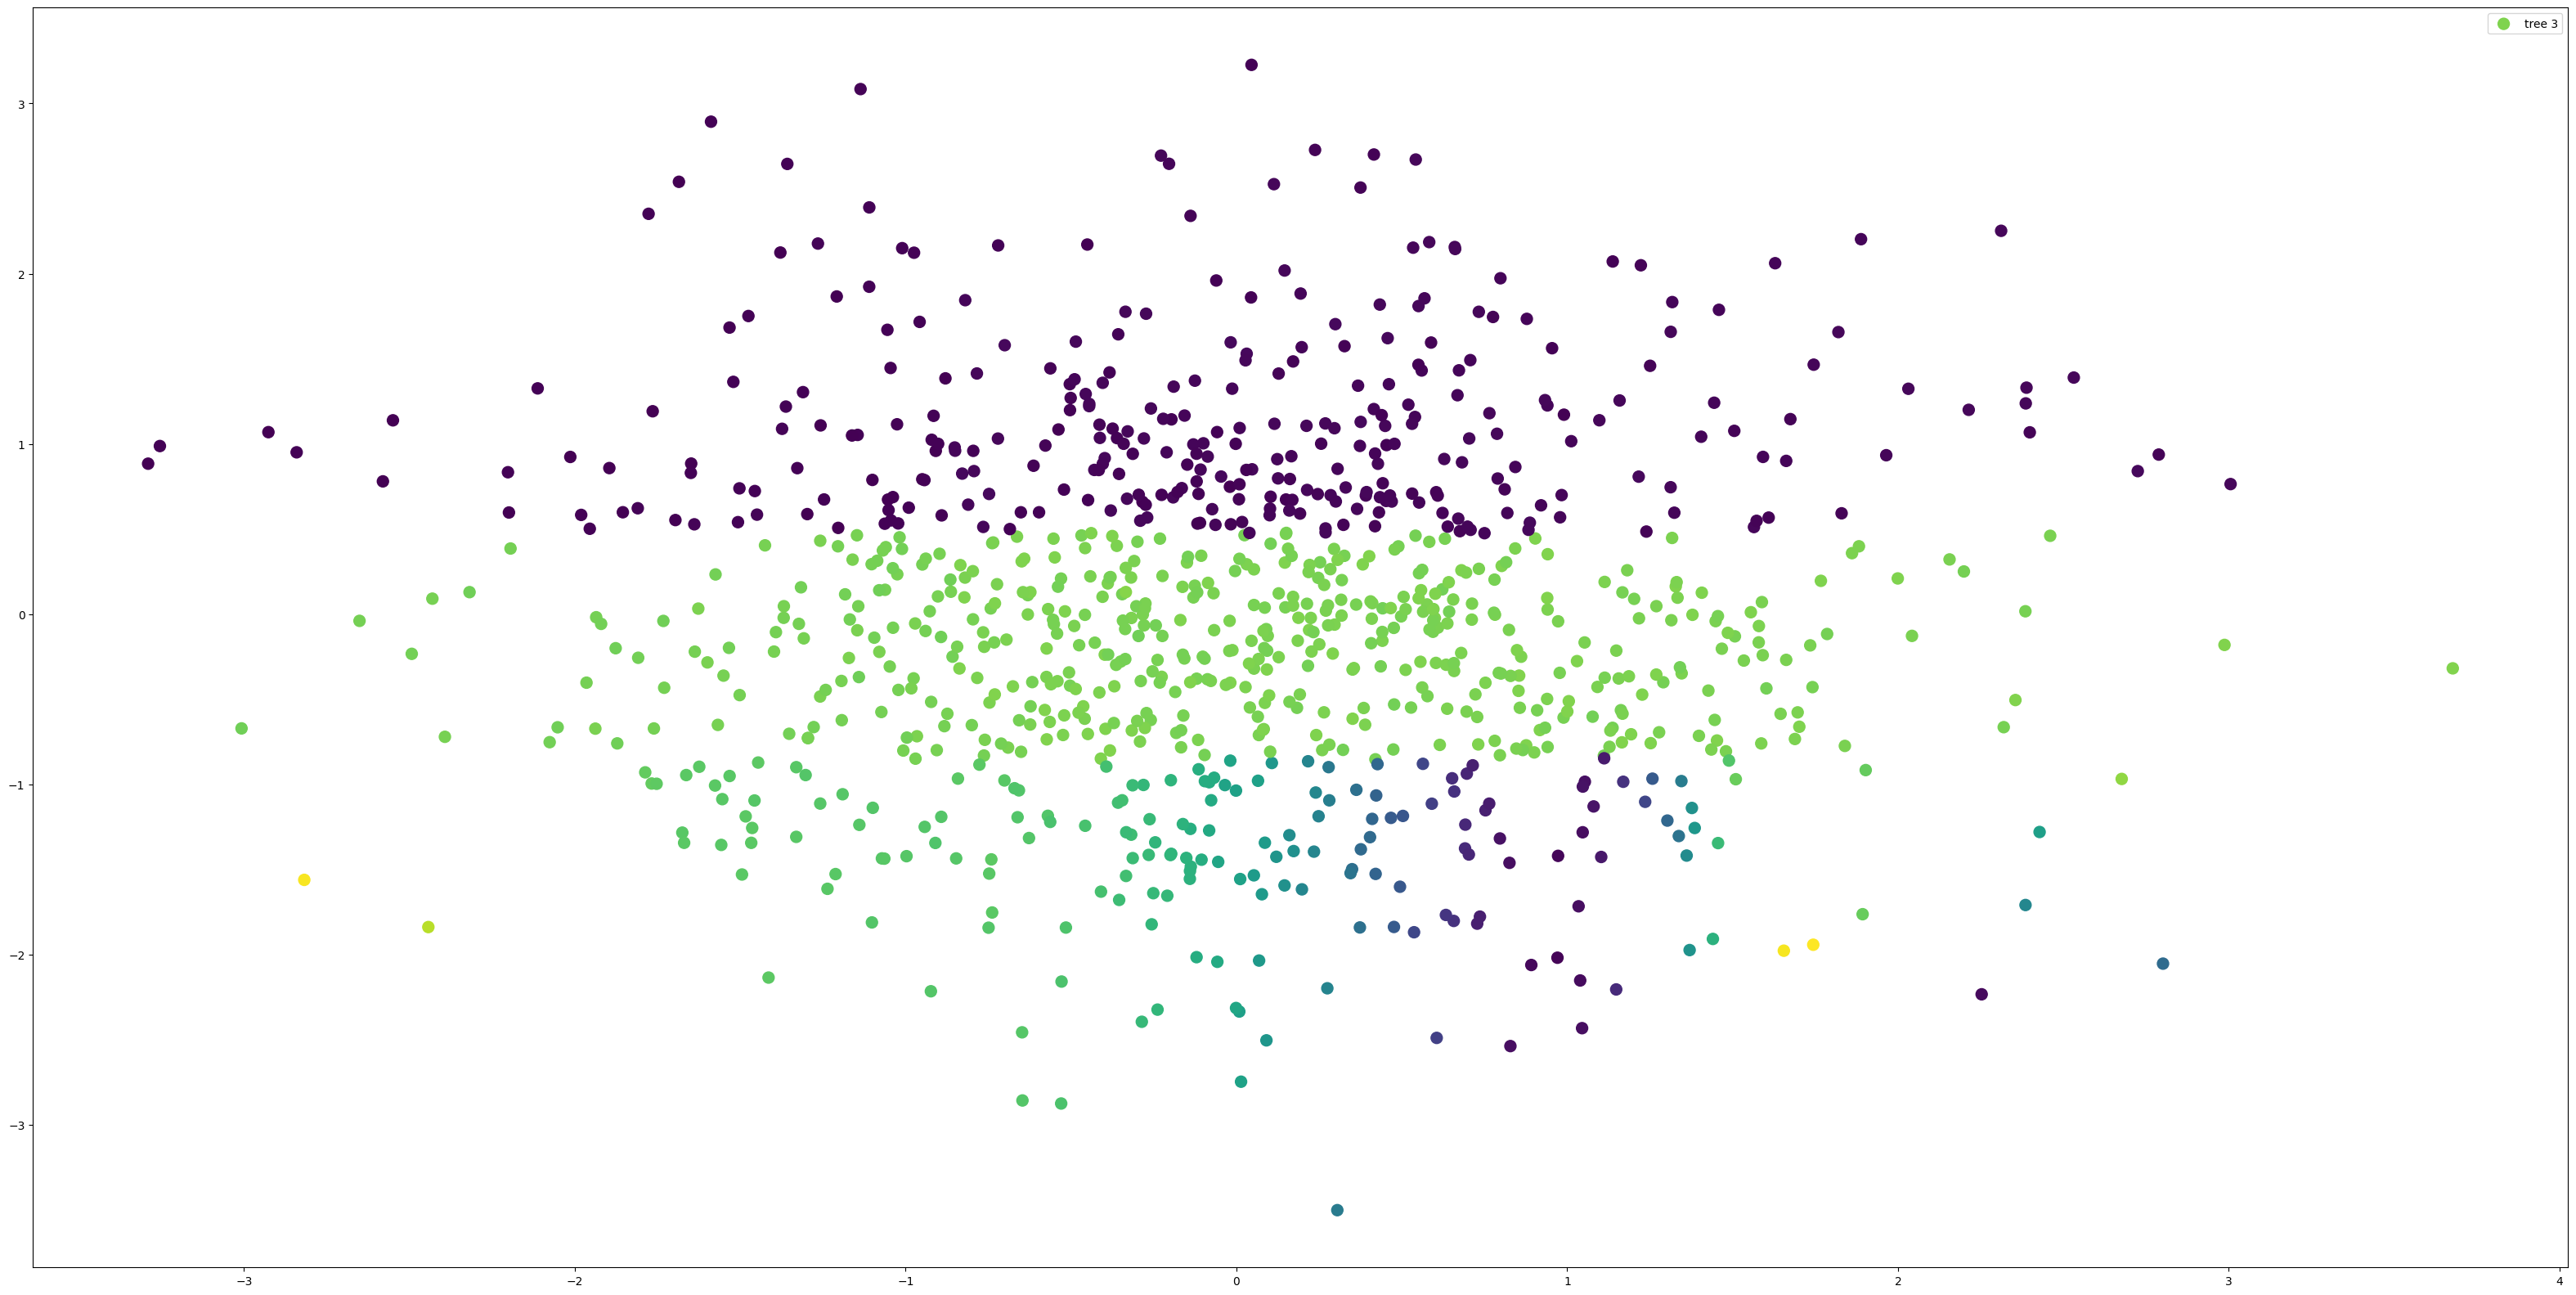

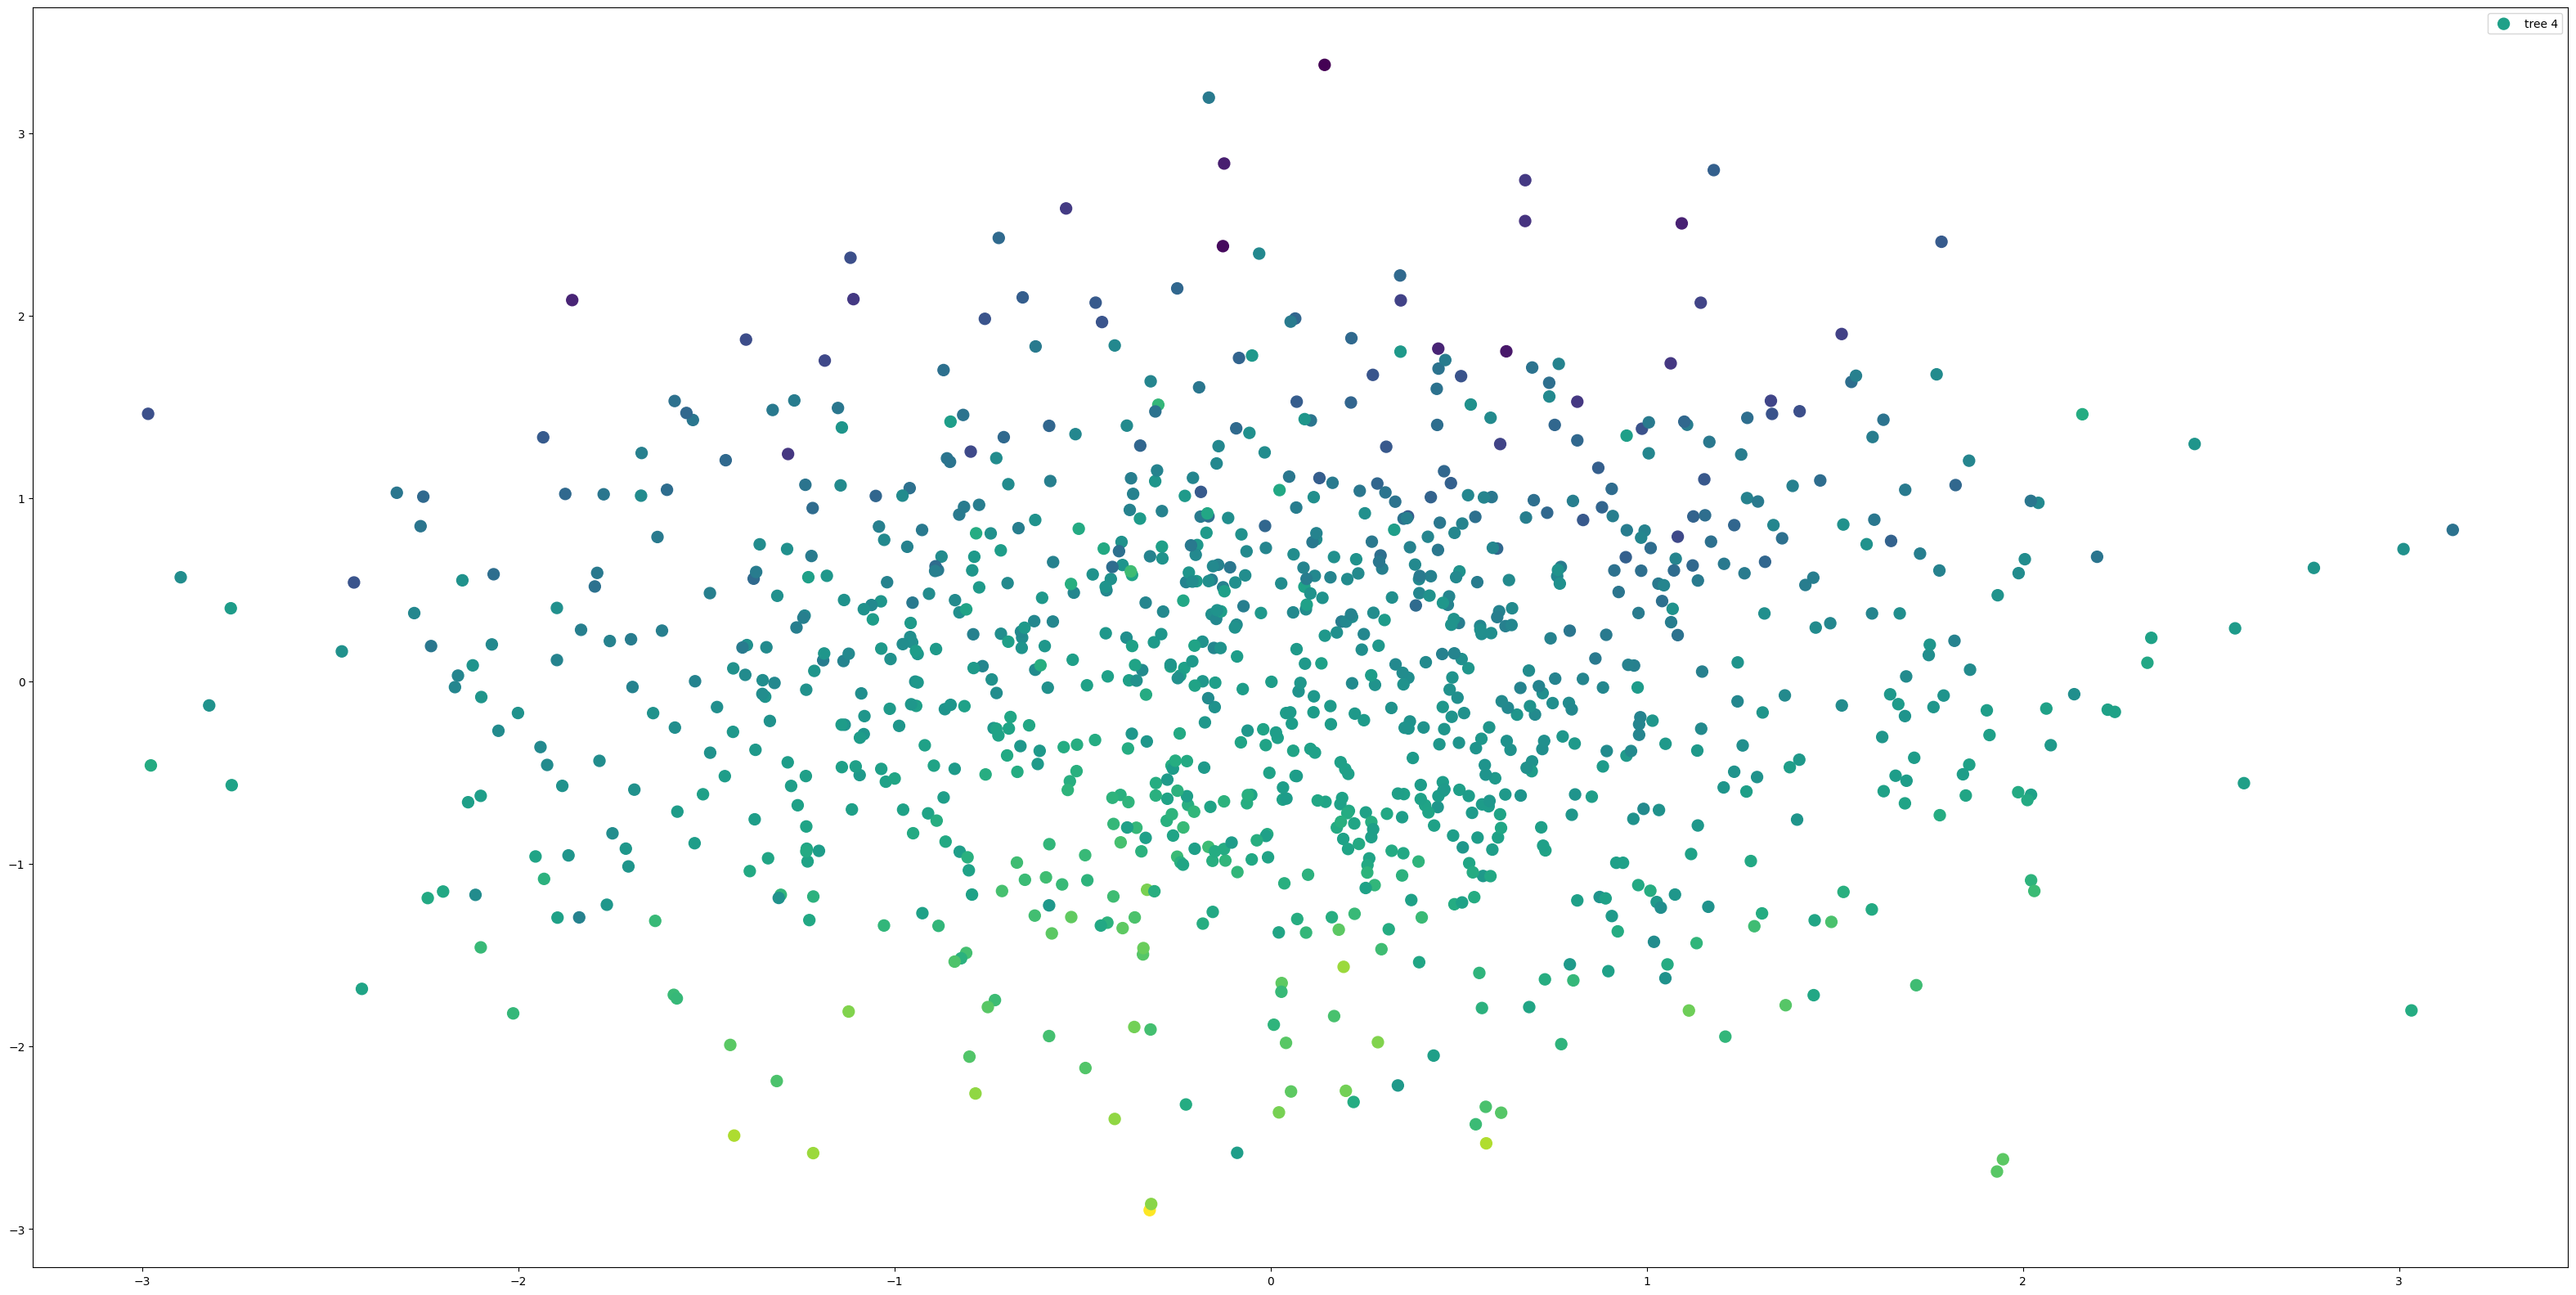

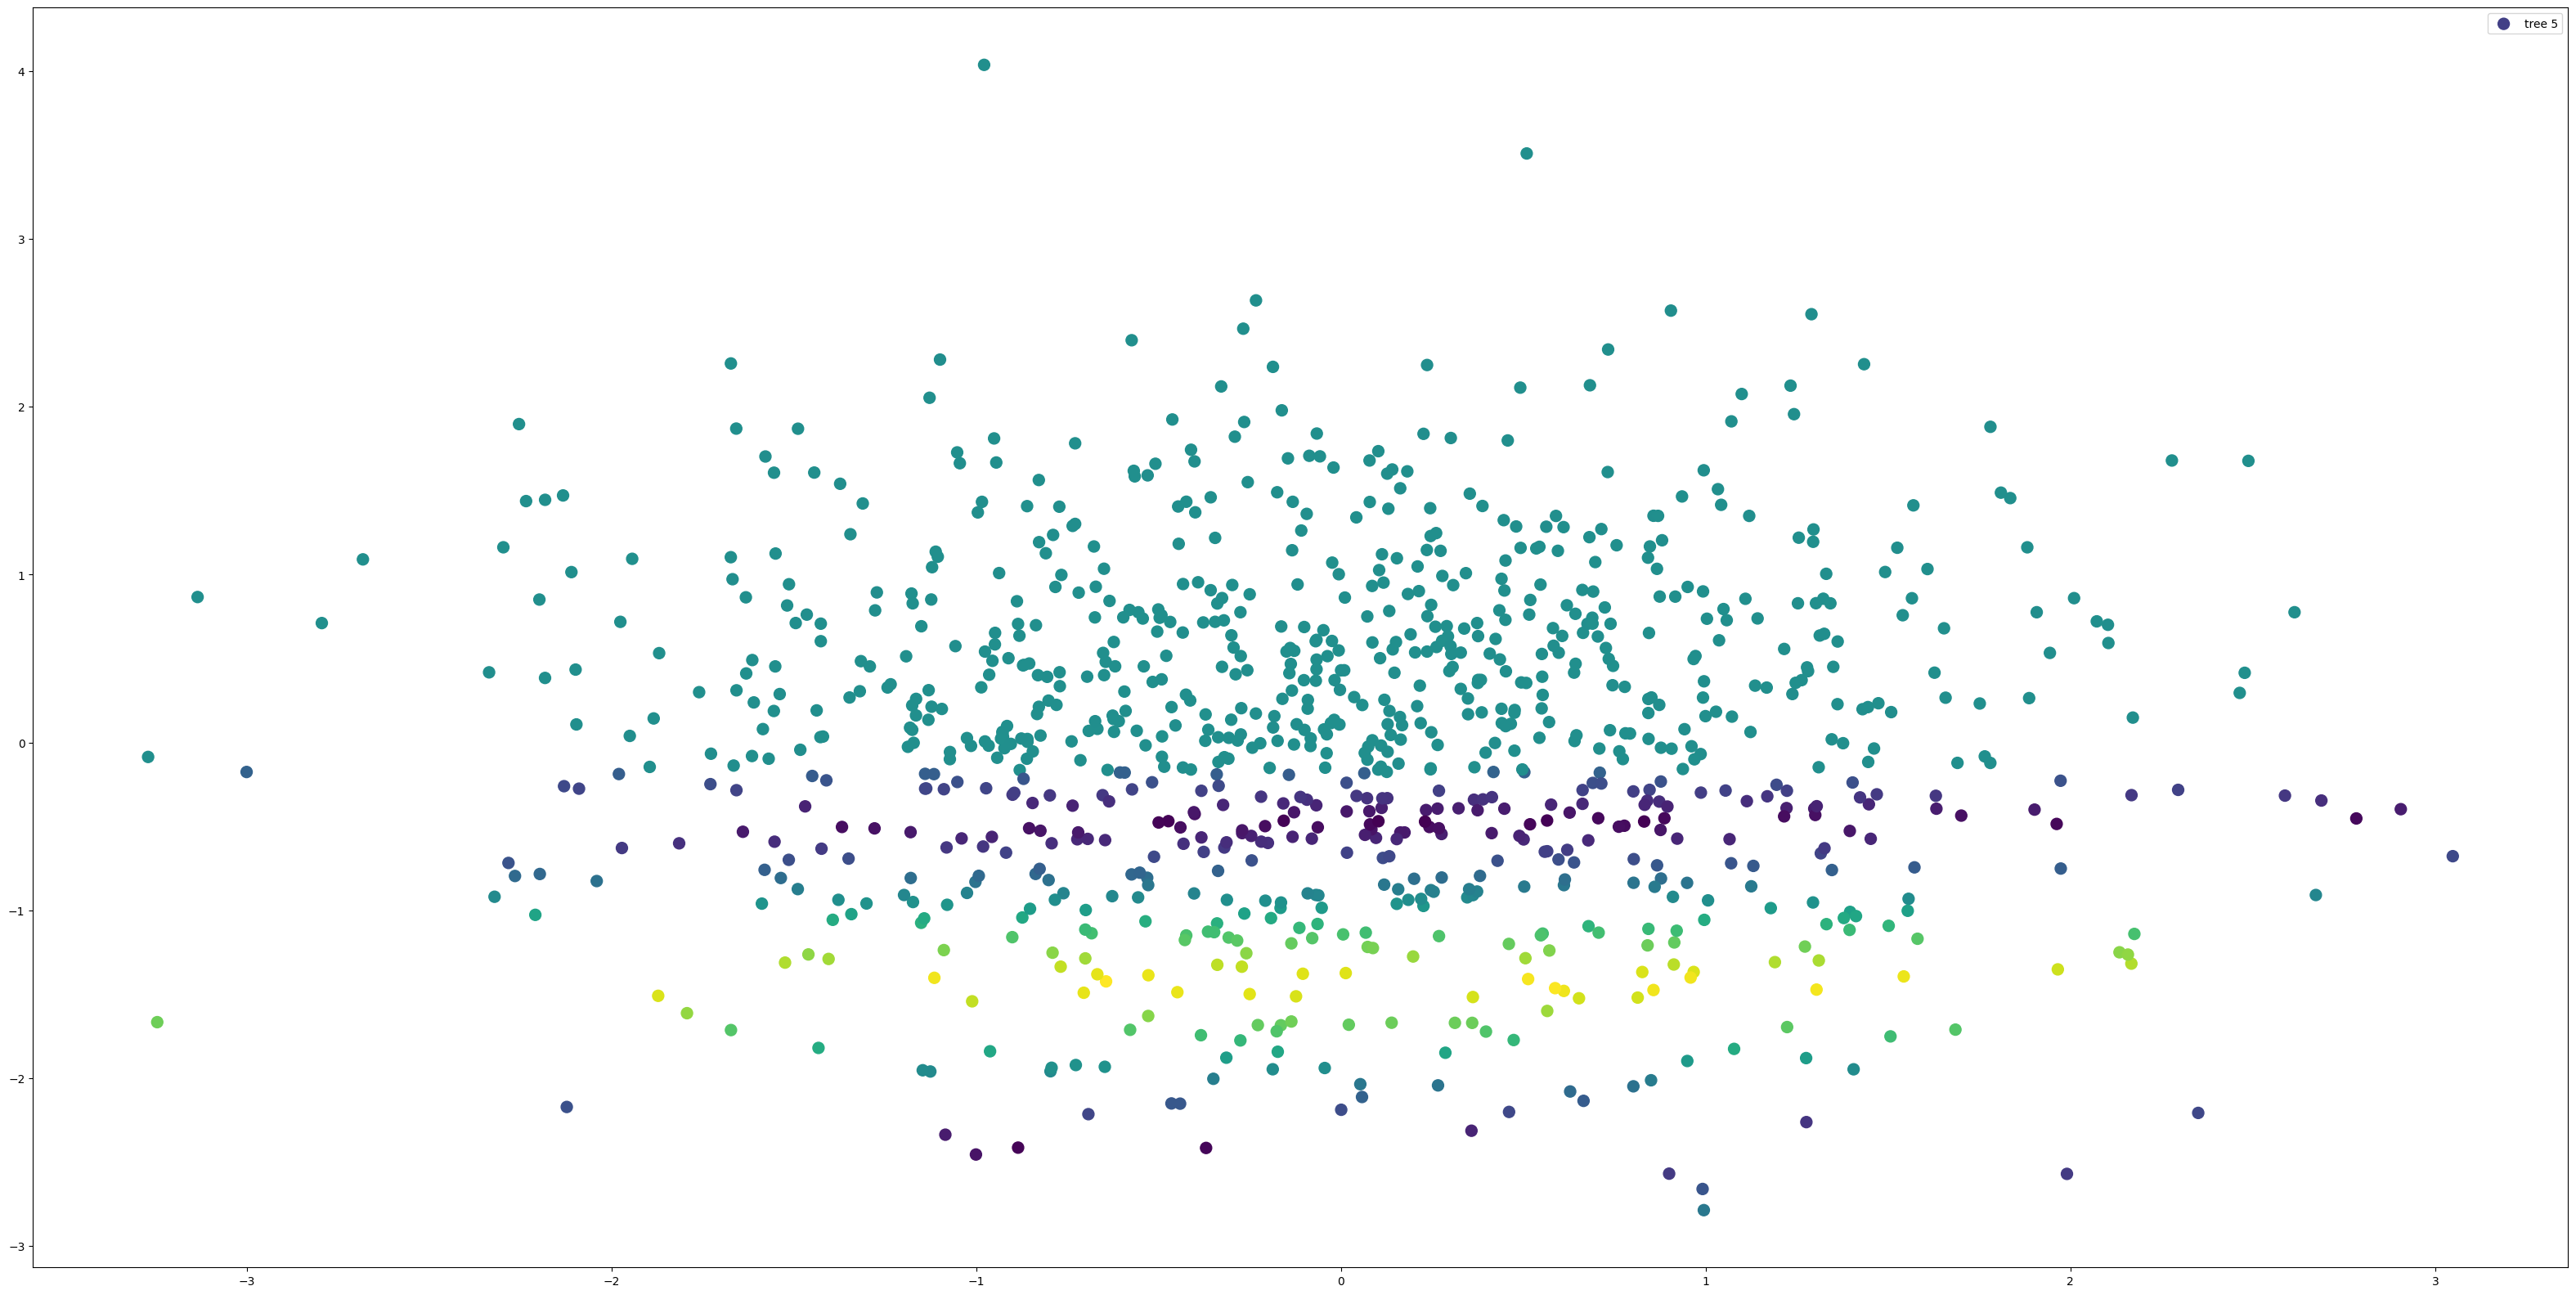

/var/folders/fw/26j13w8j3tz36pn2v7lvtlxw0000gn/T/ipykernel_93757/136677851.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


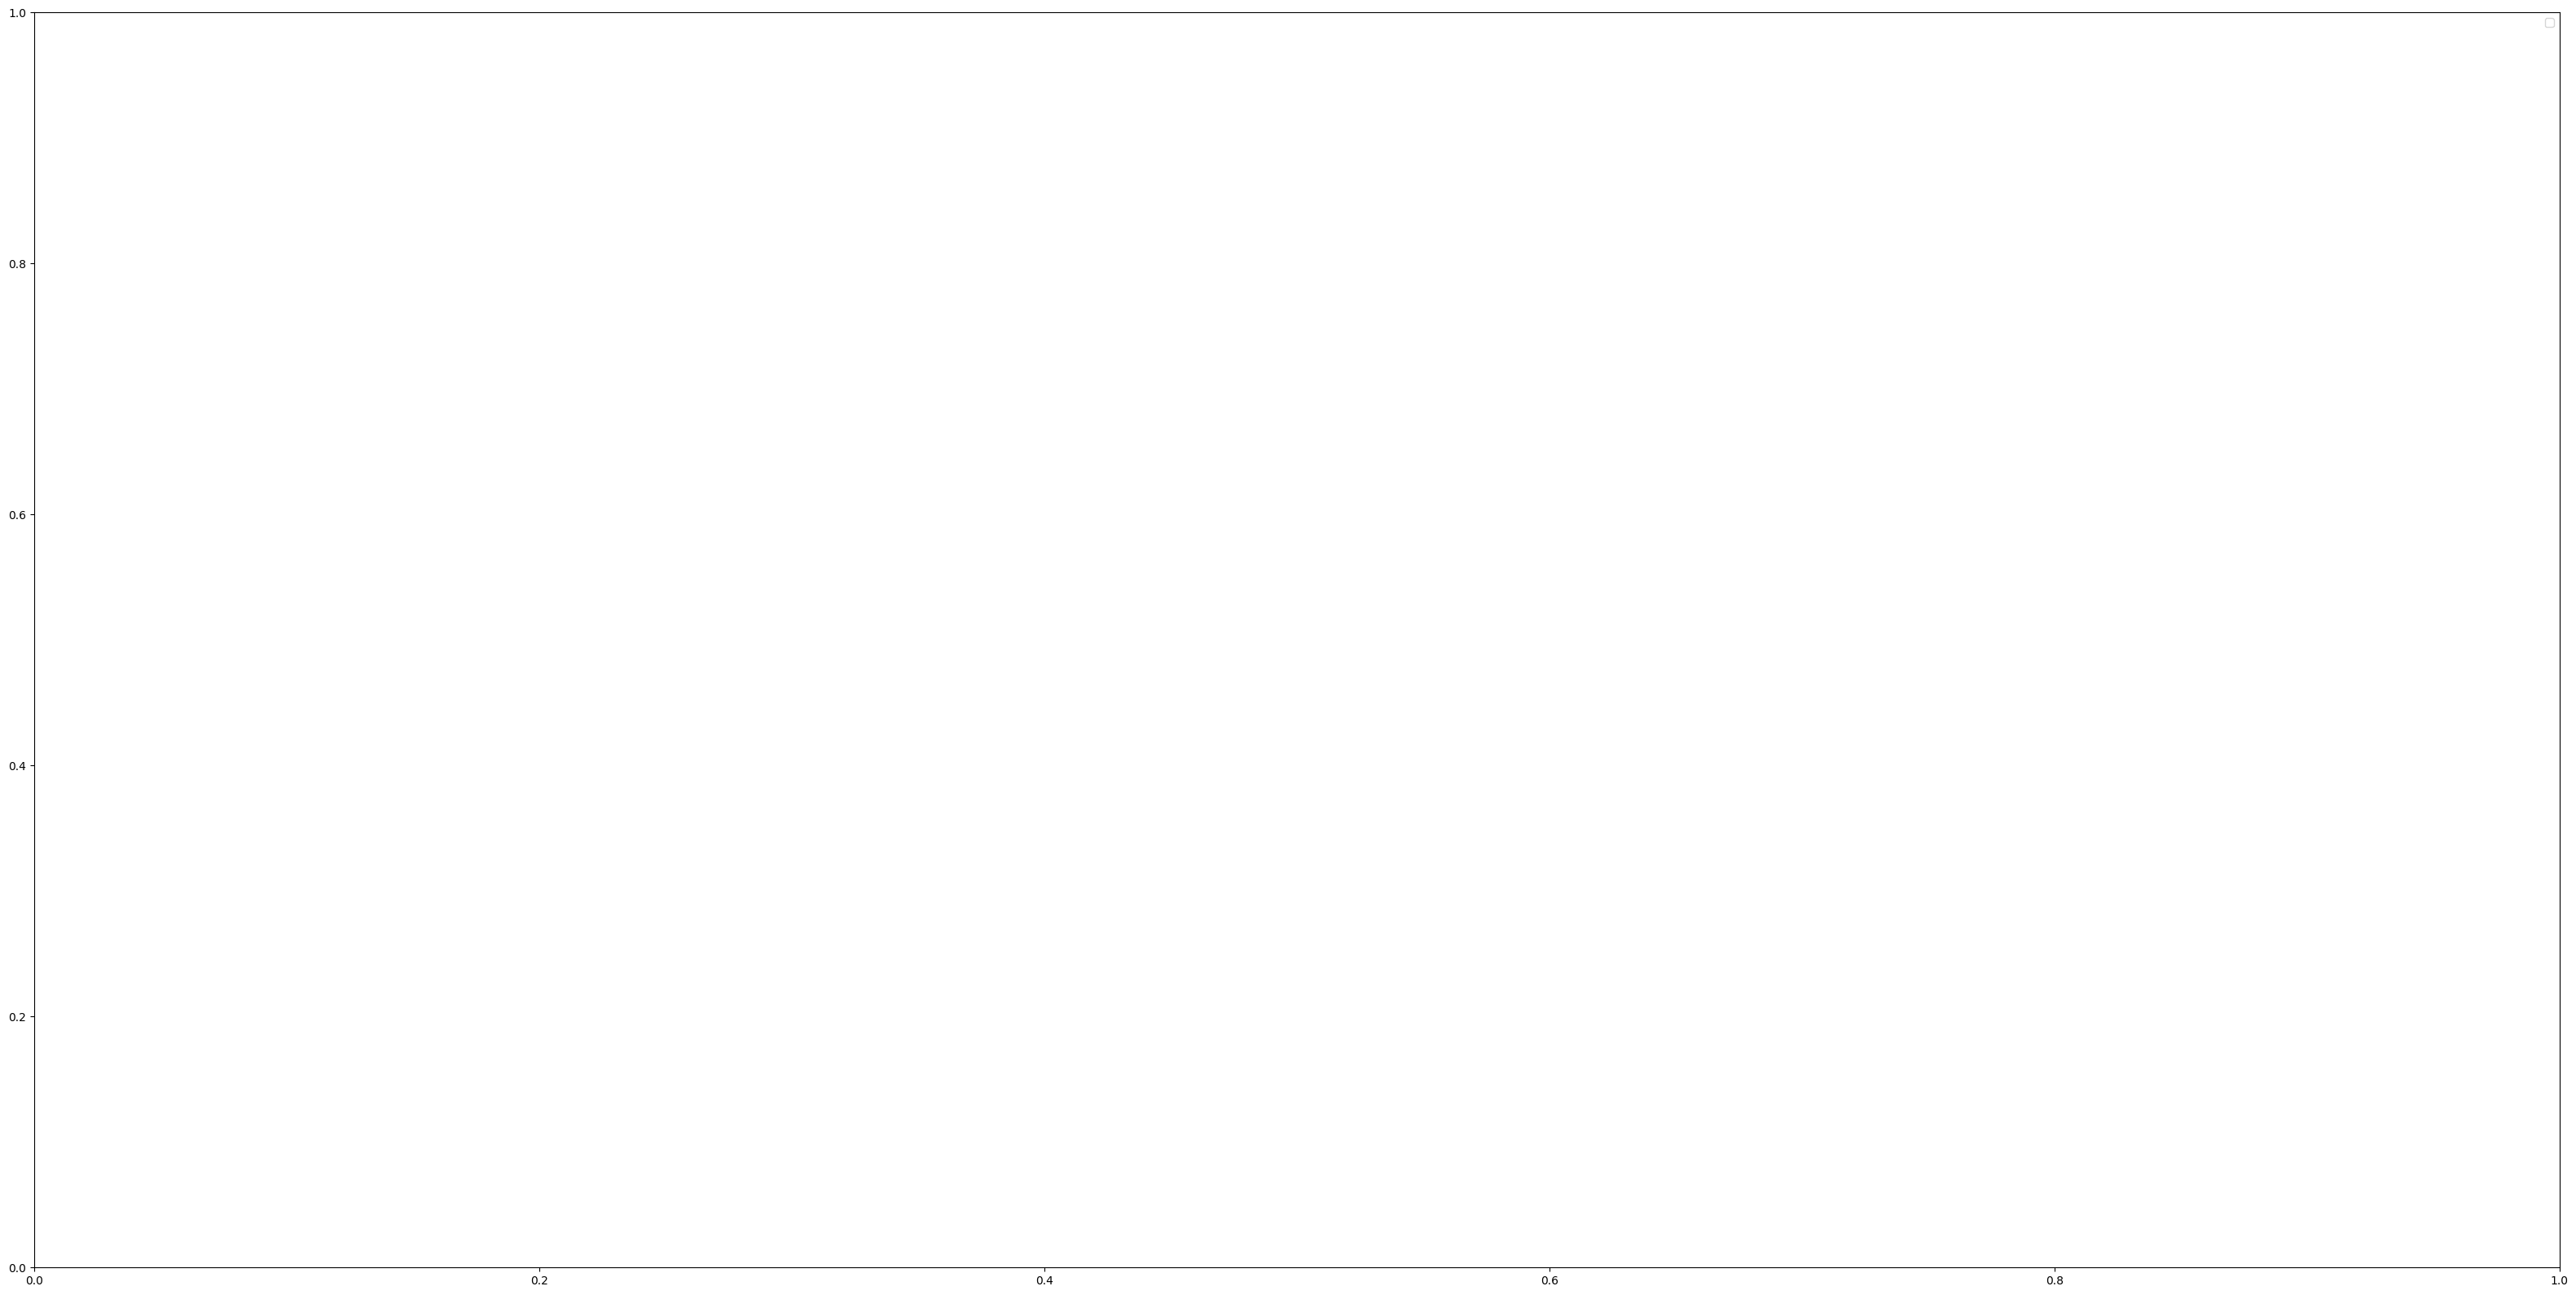

Tree 0:
gate + ~ 0.00
  (x0.99)-0.54 mul + ~ 0.00
    (x-0.53)-1.01 LEAF 0 + ~ 0.00
    (x0.23)+0.33 LEAF 2 + ~ 0.00
  (x0.85)-0.15 cubic + ~ 0.00
    (x0.07)+0.93 power + ~ 0.00
      (x-1.34)-1.27 LEAF 1 + ~ 0.00
      (x0.72)-0.60 relu + ~ 0.00
        (x-1.59)-1.15 gate + ~ 0.00
          (x0.67)-1.59 rr_repeat + ~ 0.00
            (x-1.35)-0.76 gate + ~ 0.00
              (x-0.25)-0.14 relu + ~ 0.00
                (x0.53)-0.09 LEAF 3 + ~ 0.00
              (x0.10)+0.49 rr_repeat + ~ 0.00
                (x-0.18)+0.27 LEAF 5 + ~ 0.00
          (x-0.26)-1.64 inv + ~ 0.00
            (x-0.89)+0.21 add + ~ 0.00
              (x1.69)+1.46 LEAF 4 + ~ 0.00
              (x-0.50)-1.38 rr_repeat_m + ~ 0.00
                (x-0.30)+0.23 LEAF 6 + ~ 0.00
Tree 1:
gate + ~ 0.01
  (x1.72)+0.69 relu + ~ 0.00
    (x0.42)+1.66 add + ~ 0.01
      (x-0.17)-0.20 add + ~ 0.01
        (x-0.29)-0.87 LEAF 0 + ~ 0.00
        (x1.62)+1.31 LEAF 3 + ~ 0.00
      (x-0.70)-0.00 mul + ~ 0.01
        (x-0.76)-0.

In [119]:
import matplotlib.pyplot as plt

# b, trees = get_batch(4, 1000, 1, return_trees=True)

plt.figure(figsize=(40,20))

# for tree in trees:
#     print_tree(tree)

num_features = 2

trees = []
for i in range(6):
    while True:
        x, y, tree = sample_dataset(1000, num_features,
                                    binary_op_likelihoods={**{op: 1.0 for op in binary_ops.keys()}, 'add': 2.},
                                    #unary_op_likelihoods={**{op: 1.0 for op in unary_ops.keys()}, 'rr_repeat': 10., 'rr_repeat_m': 0.},
                                    #factor_dist="normal", factor_std=2.,
                                    #bias_std=.5,
                                    max_share_oversampled_tree_leaves=3.,
                                    unary_op_likelihood=.5,
                                    max_binary_op_noise_std=.01,
                                    max_unary_op_noise_std=.01,
                                    )
        if not boring_y(y):
            break
    trees.append(tree)
    if num_features == 1:
        plt.scatter(x[:,0], y, label=f"Tree {i}")
    elif num_features == 2:
        plt.scatter(x[:,0], x[:,1], c=y, label=f"tree {i}", s=100)
        plt.legend()
        plt.show()
        plt.figure(figsize=(40,20))

plt.legend()
plt.show()

for i, tree in enumerate(trees):
    print(f"Tree {i}:")
    print_tree(tree)